# Up states: Stability of Cross-Homeostatic learning rule

Soldado-Magraner, Motanis, Laje & Buonomano (2021)  
Author: Rodrigo Laje

## Neural subsystem

Load script:  
(RUN FIRST `up states - Neural subsystem stability.ipynb`)

In [2]:
%%capture
load('up states - Neural subsystem stability.sage.py')

## Synaptic subsystem: Cross-Homeostatic

#### Cross-Homeostatic equations

In [3]:
var('dWEEdt,dWEIdt,dWIEdt,dWIIdt')
var('alpha_EE,alpha_EI,alpha_IE,alpha_II')
f_WEE = dWEEdt == alpha_EE*E*(I_set-I)
f_WEI = dWEIdt == -alpha_EI*I*(I_set-I)
f_WIE = dWIEdt == -alpha_IE*E*(E_set-E)
f_WII = dWIIdt == alpha_II*I*(E_set-E)
show(f_WEE)
show(f_WEI)
show(f_WIE)
show(f_WII)

dWEEdt == -E*(I - I_set)*alpha_EE

dWEIdt == (I - I_set)*I*alpha_EI

dWIEdt == (E - E_set)*E*alpha_IE

dWIIdt == -(E - E_set)*I*alpha_II

In [4]:
synapticFixedPoint = solve([f_WEE.subs(dWEEdt==0),f_WEI.subs(dWEIdt==0),f_WIE.subs(dWIEdt==0),f_WII.subs(dWIIdt==0)],E,I)
synapticFixedPoint_up = synapticFixedPoint[1]

Only one solution compatible with suprathreshold activity:

#### Fixed point (Up state):  
$E=E_{set}$, $I=I_{set}$ ($W_{EI}$ and $W_{IE}$ can take any value, while $W_{EE}$ and $W_{II}$ are subject to $E_{set}$ and $I_{set}$)

In [5]:
show(synapticFixedPoint_up)

[E == E_set, I == I_set]

## Quasi-steady-state approximation
1. Full system neural+synaptic
2. Nondimensionalization
3. Normalization
4. Approximation (fast neural subsystem)

### Full system

In [6]:
show(f_E)
show(f_I)
show(f_WEE)
show(f_WEI)
show(f_WIE)
show(f_WII)

dEdt == ((E*W_EE - I*W_EI - Theta_E)*g_E - E)/tau_E

dIdt == ((E*W_IE - I*W_II - Theta_I)*g_I - I)/tau_I

dWEEdt == -E*(I - I_set)*alpha_EE

dWEIdt == (I - I_set)*I*alpha_EI

dWIEdt == (E - E_set)*E*alpha_IE

dWIIdt == -(E - E_set)*I*alpha_II

### Nondimensionalization

#### Definition of nondimensional variables  
Define new (nondimensional) variables $e$, $i$, etc. and scaling parameters $E_0$, $I_0$, etc:  
$e = E/E_0$  
$i = I/I_0$  
$\tau = t/\tau_0$  
$w_{EE} = W_{EE}/W_{EE0}$  
... etc

In [7]:
var('e,i')
var('E_0,I_0,tau_0')
var('w_EE,w_EI,w_IE,w_II')
var('W_EE0,W_EI0,W_IE0,W_II0')
var('dedtau,didtau')
var('dwEEdtau,dwEIdtau,dwIEdtau,dwIIdtau');

Replacement rules:

In [8]:
nondim = [E==E_0*e,dEdt==(E_0/tau_0)*dedtau,I==I_0*i,dIdt==(I_0/tau_0)*didtau,W_EE==W_EE0*w_EE,W_EI==W_EI0*w_EI,W_IE==W_IE0*w_IE,W_II==W_II0*w_II,dWEEdt==(W_EE0/tau_0)*dwEEdtau,dWEIdt==(W_EI0/tau_0)*dwEIdtau,dWIEdt==(W_IE0/tau_0)*dwIEdtau,dWIIdt==(W_II0/tau_0)*dwIIdtau]
show(nondim)

[E == E_0*e,
 dEdt == E_0*dedtau/tau_0,
 I == I_0*i,
 dIdt == I_0*didtau/tau_0,
 W_EE == W_EE0*w_EE,
 W_EI == W_EI0*w_EI,
 W_IE == W_IE0*w_IE,
 W_II == W_II0*w_II,
 dWEEdt == W_EE0*dwEEdtau/tau_0,
 dWEIdt == W_EI0*dwEIdtau/tau_0,
 dWIEdt == W_IE0*dwIEdtau/tau_0,
 dWIIdt == W_II0*dwIIdtau/tau_0]

Full system after replacement:

In [9]:
f_e = f_E.subs(nondim)*tau_E/E_0
f_i = f_I.subs(nondim)*tau_I/I_0
f_wEE = f_WEE.subs(nondim)*tau_0/W_EE0
f_wEI = f_WEI.subs(nondim)*tau_0/W_EI0
f_wIE = f_WIE.subs(nondim)*tau_0/W_IE0
f_wII = f_WII.subs(nondim)*tau_0/W_II0
show(f_e.expand())
show(f_i.expand())
show(f_wEE.expand())
show(f_wEI.expand())
show(f_wIE.expand())
show(f_wII.expand())

dedtau*tau_E/tau_0 == W_EE0*e*g_E*w_EE - I_0*W_EI0*g_E*i*w_EI/E_0 - e - Theta_E*g_E/E_0

didtau*tau_I/tau_0 == E_0*W_IE0*e*g_I*w_IE/I_0 - W_II0*g_I*i*w_II - Theta_I*g_I/I_0 - i

dwEEdtau == -E_0*I_0*alpha_EE*e*i*tau_0/W_EE0 + E_0*I_set*alpha_EE*e*tau_0/W_EE0

dwEIdtau == I_0^2*alpha_EI*i^2*tau_0/W_EI0 - I_0*I_set*alpha_EI*i*tau_0/W_EI0

dwIEdtau == E_0^2*alpha_IE*e^2*tau_0/W_IE0 - E_0*E_set*alpha_IE*e*tau_0/W_IE0

dwIIdtau == -E_0*I_0*alpha_II*e*i*tau_0/W_II0 + E_set*I_0*alpha_II*i*tau_0/W_II0

### Normalization of equations  
Choose scaling parameters such that nondimensional variables are of order 1:  
$\tau_0 = 1/(\alpha_{EE} g_E E_{set}I_{set})$  
$E_0 = E_{set}$  
$I_0 = I_{set}$  
$W_{EE0} = 1/g_E$  
$W_{EI0} = 1/(R g_E)$  
$W_{IE0} = R/g_I$  
$W_{II0} = 1/g_I$  

Define new parameters:  
$\epsilon_E = \tau_E/\tau_0$  
$\epsilon_I = \tau_I/\tau_0$  
$\alpha_2 = \alpha_{EI}/\alpha_{EE}$  
$\alpha_3 = \alpha_{IE}/\alpha_{EE}$  
$\alpha_4 = \alpha_{II}/\alpha_{EE}$  
$R = E_{set}/I_{set}$  
$g = g_E/g_I$  
$\theta_E = (g_E/E_{set}) \Theta_E$  
$\theta_I = (g_I/I_{set}) \Theta_I$

In [10]:
var('epsilon_E,epsilon_I')
var('theta_E,theta_I,R,g,alpha_2,alpha_3,alpha_4')
normaliz = [tau_0==1/(alpha_EE*g_E*E_set*I_set),tau_E==epsilon_E*tau_0,tau_I==epsilon_I*tau_0,E_0==E_set,I_0==I_set,W_EE0==1/g_E,W_EI0==1/(R*g_E),W_IE0==R/g_I,W_II0==1/g_I,I_set==E_set/R,Theta_E==theta_E*E_set/g_E,Theta_I==theta_I*I_set/g_I,g_I==g*g_E,alpha_EI==alpha_2*alpha_EE,alpha_IE==alpha_3*alpha_EE,alpha_II==alpha_4*alpha_EE]
show(normaliz)

[tau_0 == 1/(E_set*I_set*alpha_EE*g_E),
 tau_E == epsilon_E*tau_0,
 tau_I == epsilon_I*tau_0,
 E_0 == E_set,
 I_0 == I_set,
 W_EE0 == (1/g_E),
 W_EI0 == 1/(R*g_E),
 W_IE0 == R/g_I,
 W_II0 == (1/g_I),
 I_set == E_set/R,
 Theta_E == E_set*theta_E/g_E,
 Theta_I == I_set*theta_I/g_I,
 g_I == g*g_E,
 alpha_EI == alpha_2*alpha_EE,
 alpha_IE == alpha_3*alpha_EE,
 alpha_II == alpha_4*alpha_EE]

Replacement rules: numerical values, parameter definitions, nondimensionalized weights

In [11]:
parameters = [epsilon_E==tau_E/tau_0,epsilon_I==tau_I/tau_0,R==E_set/I_set,theta_E==(g_E/E_set)*Theta_E,theta_I==(g_I/I_set)*Theta_I,W_EE0==1/g_E,W_EI0==1/(R*g_E),W_IE0==R/g_I,W_II0==1/g_I,g==g_I/g_E,alpha_2==alpha_EI/alpha_EE,alpha_3==alpha_IE/alpha_EE,alpha_4==alpha_II/alpha_EE]
weights = [w_EE==W_EE/W_EE0,w_IE==W_IE/W_IE0,w_EI==W_EI/W_EI0,w_II==W_II/W_II0]

#### Nondimensionalized, normalized equations

In [12]:
f_e_norm = f_e.subs(normaliz).subs(normaliz).subs(normaliz).expand()
f_i_norm = f_i.subs(normaliz).subs(normaliz).subs(normaliz).expand()
f_wEE_norm = f_wEE.subs(normaliz).subs(normaliz).subs(normaliz).expand().factor()
f_wEI_norm = f_wEI.subs(normaliz).subs(normaliz).expand().factor()
f_wIE_norm = f_wIE.subs(normaliz).subs(normaliz).expand().factor()
f_wII_norm = f_wII.subs(normaliz).subs(normaliz).subs(normaliz).expand().factor()
show(f_e_norm)
show(f_i_norm)
show(f_wEE_norm)
show(f_wEI_norm)
show(f_wIE_norm)
show(f_wII_norm)

dedtau*epsilon_E == e*w_EE - e - theta_E - i*w_EI/R^2

didtau*epsilon_I == R^2*e*w_IE - i*w_II - i - theta_I

dwEEdtau == -e*(i - 1)

dwEIdtau == alpha_2*(i - 1)*i

dwIEdtau == alpha_3*(e - 1)*e*g

dwIIdtau == -alpha_4*(e - 1)*g*i

### Approximation: Quasi-steady-state solutions for the neural subsystem

Neural dynamics is much faster than synaptic dynamics, thus we assume E and I are in "equilibrium" (~instantaneous convergence to quasi-steady-state values, as if the weights were fixed) while the synaptic weights evolve according to their slow dynamics.  
That is, we consider  
$\tau_E \ll \tau_0$ and $\tau_I \ll \tau_0$  
thus  
$\epsilon_E \ll 1$ and $\epsilon_E \ll 1$  
thus  
$\epsilon_E\frac{de}{d\tau} \sim 0$ and $\epsilon_I\frac{di}{d\tau} \sim 0$:

In [13]:
neuralFixedPoint_nondim = solve([f_e_norm.subs(dedtau==0),f_i_norm.subs(didtau==0)],e,i)
e_ss = neuralFixedPoint_nondim[0][0]
i_ss = neuralFixedPoint_nondim[0][1]
show(e_ss)
show(i_ss)

e == -(R^2*theta_E*(w_II + 1) - theta_I*w_EI)/(R^2*w_EI*w_IE - R^2*w_EE*(w_II + 1) + R^2*(w_II + 1))

i == -(R^2*theta_E*w_IE - theta_I*w_EE + theta_I)/(w_EI*w_IE - w_EE*(w_II + 1) + w_II + 1)

## Stability of the Up state

### Jacobian of the nondimensionalized synaptic dynamics in the QSS approximation

If $\frac{dw_{EE}}{d\tau} = f_1(w_{EE},w_{EI}...)$, ...  
then the Jacobian matrix is
$J_{qss} = \begin{pmatrix}
\frac{\partial f_1}{\partial w_{EE}} & \frac{\partial f_1}{\partial w_{EI}} & ... \\
... & ... & ...
\end{pmatrix}
$  
Stability analysis: we should evaluate $J_{qss}$ at the QSS fixed point and compute its eigenvalues. If at least one eigenvalue has positive real part, then the fixed point is unstable.

### Jacobian matrix

The Jacobian matrix $J$ is the matrix of all the first-order partial derivatives of the learning rule with respect to the weights. In terms of the QSS synaptic system:  
$\displaystyle \frac{dw_{EE}}{d \tau} = f_1(w_{EE},w_{EI},\ldots)$  
$\displaystyle \frac{dw_{EI}}{d \tau} = f_2(w_{EE},w_{EI},\ldots)$  ... etc  

then  
\begin{array}{lll}
J_{11} = \displaystyle \frac{\partial f_1}{\partial w_{EE}} & J_{12} = \displaystyle \frac{\partial f_1}{\partial w_{EI}} & \ldots \\
J_{21} = \displaystyle \frac{\partial f_2}{\partial w_{EE}} & J_{22} = \displaystyle \frac{\partial f_2}{\partial w_{EI}} & \ldots \\
\vdots & \vdots &
\end{array}  

Instead of substituting $e = e_{ss}(w_{EE},w_{EI},w_{IE},w_{II})$ and $i = i_{ss}(w_{EE},w_{EI},w_{IE},w_{II})$ directly into $f_1(e,i), \ldots$ and then differentiating, we will use the chain rule:

#### Actual computation using the chain rule

The learning rule is expressed as a composition of functions $e$ and $i$ of the weights:  
$\displaystyle \frac{dw_{EE}}{d \tau} = f_1(e,i)$  
$\displaystyle \frac{dw_{EI}}{d \tau} = f_2(e,i)$ ... etc  

Using the chain rule, the Jacobian matrix elements can be computed as  
$J_{11} = \displaystyle \frac{\partial f_1}{\partial w_{EE}} = \frac{\partial f_1}{\partial e} \frac{\partial e}{\partial w_{EE}} + \frac{\partial f_1}{\partial i} \frac{\partial i}{\partial w_{EE}}$  
$J_{12} = \displaystyle \frac{\partial f_1}{\partial w_{EI}} = \frac{\partial f_1}{\partial e} \frac{\partial e}{\partial w_{EI}} + \frac{\partial f_1}{\partial i} \frac{\partial i}{\partial w_{EI}}$  
$J_{21} = \displaystyle \frac{\partial f_2}{\partial w_{EE}} = \frac{\partial f_2}{\partial e} \frac{\partial e}{\partial w_{EE}} + \frac{\partial f_2}{\partial i} \frac{\partial i}{\partial w_{EE}}$  
$J_{22} = \displaystyle \frac{\partial f_2}{\partial w_{EI}} = \frac{\partial f_2}{\partial e} \frac{\partial e}{\partial w_{EI}} + \frac{\partial f_2}{\partial i} \frac{\partial i}{\partial w_{EI}}$

In [14]:
var('dedwEE_ph,didwEE_ph') #placeholders
var('dedwEI_ph,didwEI_ph')
var('dedwIE_ph,didwIE_ph')
var('dedwII_ph,didwII_ph')
J_11 = diff(dwEEdtau.subs(f_wEE_norm),e)*dedwEE_ph + diff(dwEEdtau.subs(f_wEE_norm),i)*didwEE_ph
J_12 = diff(dwEEdtau.subs(f_wEE_norm),e)*dedwEI_ph + diff(dwEEdtau.subs(f_wEE_norm),i)*didwEI_ph
J_13 = diff(dwEEdtau.subs(f_wEE_norm),e)*dedwIE_ph + diff(dwEEdtau.subs(f_wEE_norm),i)*didwIE_ph
J_14 = diff(dwEEdtau.subs(f_wEE_norm),e)*dedwII_ph + diff(dwEEdtau.subs(f_wEE_norm),i)*didwII_ph
J_21 = diff(dwEIdtau.subs(f_wEI_norm),e)*dedwEE_ph + diff(dwEIdtau.subs(f_wEI_norm),i)*didwEE_ph
J_22 = diff(dwEIdtau.subs(f_wEI_norm),e)*dedwEI_ph + diff(dwEIdtau.subs(f_wEI_norm),i)*didwEI_ph
J_23 = diff(dwEIdtau.subs(f_wEI_norm),e)*dedwIE_ph + diff(dwEIdtau.subs(f_wEI_norm),i)*didwIE_ph
J_24 = diff(dwEIdtau.subs(f_wEI_norm),e)*dedwII_ph + diff(dwEIdtau.subs(f_wEI_norm),i)*didwII_ph
J_31 = diff(dwIEdtau.subs(f_wIE_norm),e)*dedwEE_ph + diff(dwIEdtau.subs(f_wIE_norm),i)*didwEE_ph
J_32 = diff(dwIEdtau.subs(f_wIE_norm),e)*dedwEI_ph + diff(dwIEdtau.subs(f_wIE_norm),i)*didwEI_ph
J_33 = diff(dwIEdtau.subs(f_wIE_norm),e)*dedwIE_ph + diff(dwIEdtau.subs(f_wIE_norm),i)*didwIE_ph
J_34 = diff(dwIEdtau.subs(f_wIE_norm),e)*dedwII_ph + diff(dwIEdtau.subs(f_wIE_norm),i)*didwII_ph
J_41 = diff(dwIIdtau.subs(f_wII_norm),e)*dedwEE_ph + diff(dwIIdtau.subs(f_wII_norm),i)*didwEE_ph
J_42 = diff(dwIIdtau.subs(f_wII_norm),e)*dedwEI_ph + diff(dwIIdtau.subs(f_wII_norm),i)*didwEI_ph
J_43 = diff(dwIIdtau.subs(f_wII_norm),e)*dedwIE_ph + diff(dwIIdtau.subs(f_wII_norm),i)*didwIE_ph
J_44 = diff(dwIIdtau.subs(f_wII_norm),e)*dedwII_ph + diff(dwIIdtau.subs(f_wII_norm),i)*didwII_ph
J = matrix([[J_11,J_12,J_13,J_14],[J_21,J_22,J_23,J_24],[J_31,J_32,J_33,J_34],[J_41,J_42,J_43,J_44]])
show(J)

[                    -didwEE_ph*e - dedwEE_ph*(i - 1)                     -didwEI_ph*e - dedwEI_ph*(i - 1)                     -didwIE_ph*e - dedwIE_ph*(i - 1)                     -didwII_ph*e - dedwII_ph*(i - 1)]
[             (alpha_2*(i - 1) + alpha_2*i)*didwEE_ph              (alpha_2*(i - 1) + alpha_2*i)*didwEI_ph              (alpha_2*(i - 1) + alpha_2*i)*didwIE_ph              (alpha_2*(i - 1) + alpha_2*i)*didwII_ph]
[         (alpha_3*(e - 1)*g + alpha_3*e*g)*dedwEE_ph          (alpha_3*(e - 1)*g + alpha_3*e*g)*dedwEI_ph          (alpha_3*(e - 1)*g + alpha_3*e*g)*dedwIE_ph          (alpha_3*(e - 1)*g + alpha_3*e*g)*dedwII_ph]
[-alpha_4*didwEE_ph*(e - 1)*g - alpha_4*dedwEE_ph*g*i -alpha_4*didwEI_ph*(e - 1)*g - alpha_4*dedwEI_ph*g*i -alpha_4*didwIE_ph*(e - 1)*g - alpha_4*dedwIE_ph*g*i -alpha_4*didwII_ph*(e - 1)*g - alpha_4*dedwII_ph*g*i]

In order to compute the eigenvalues of the Jacobian matrix we need:  
- the (quasi)steady-state values $e=e_{ss}(w_{EE},w_{EI},\ldots)$ and $i=i_{ss}(w_{EE},w_{EI},\ldots)$  
- the partial derivatives $\displaystyle \frac{de}{dw_{EE}} \ldots$  
- the fixed point values $w_{EEup}, w_{EIup},\ldots$

#### Quasi-steady-state values of $e$ and $i$

In [15]:
show(e_ss)
show(i_ss)

e == -(R^2*theta_E*(w_II + 1) - theta_I*w_EI)/(R^2*w_EI*w_IE - R^2*w_EE*(w_II + 1) + R^2*(w_II + 1))

i == -(R^2*theta_E*w_IE - theta_I*w_EE + theta_I)/(w_EI*w_IE - w_EE*(w_II + 1) + w_II + 1)

#### Partial derivatives

In [16]:
dedwEE = diff(e.subs(e_ss),w_EE).factor()
dedwEI = diff(e.subs(e_ss),w_EI).factor()
dedwIE = diff(e.subs(e_ss),w_IE).factor()
dedwII = diff(e.subs(e_ss),w_II).factor()
didwEE = diff(i.subs(i_ss),w_EE).factor()
didwEI = diff(i.subs(i_ss),w_EI).factor()
didwIE = diff(i.subs(i_ss),w_IE).factor()
didwII = diff(i.subs(i_ss),w_II).factor()
dxdw = [dedwEE_ph==dedwEE,dedwEI_ph==dedwEI,dedwIE_ph==dedwIE,dedwII_ph==dedwII,didwEE_ph==didwEE,didwEI_ph==didwEI,didwIE_ph==didwIE,didwII_ph==didwII]

#### Fixed points

Fixed points are defined by $\frac{d w_{EE}}{d\tau}=0$, etc.  
1. Fixed points without substitution: (i.e. in terms of $e$ and $i$)

In [17]:
synapticFixedPoint_qss_nosubs = solve([f_wEE_norm.subs(dwEEdtau==0),f_wEI_norm.subs(dwEIdtau==0),f_wIE_norm.subs(dwIEdtau==0),f_wII_norm.subs(dwIIdtau==0)],e,i)
synapticFixedPoint_qss_nosubs_up = synapticFixedPoint_qss_nosubs[1]
show(synapticFixedPoint_qss_nosubs_up)

[e == 1, i == 1]

2. Fixed points with substitution (i.e. explicit values of the weights).  
Solve for the weight values at the Up state:

In [18]:
synapticFixedPoint_qss_subs = solve([e_ss.subs(e==1),i_ss.subs(i==1)],w_EI,w_II)
synapticFixedPoint_qss_subs_up = synapticFixedPoint_qss_subs[0]
show(synapticFixedPoint_qss_subs_up)

[w_EI == -R^2*theta_E + R^2*w_EE - R^2, w_II == R^2*w_IE - theta_I - 1]

Interpretation of the above expressions: the weights converge to a plane attractor (a 2D plane in 4D phase space space---two weights are free and the other two are linear functions of the first two), so potentially many different combinations of weight values are a solution.  

Confirm obtained solution:

In [19]:
show(e_ss.subs(synapticFixedPoint_qss_subs_up).full_simplify())
show(i_ss.subs(synapticFixedPoint_qss_subs_up).full_simplify())

e == 1

i == 1

Fixed-point values of the original weights at the Up state:

In [20]:
synapticFixedPoint_qss_subs_up_orig = [W_EIup,W_IIup]
show(synapticFixedPoint_qss_subs_up_orig)

[W_EI == ((E_set*W_EE - Theta_E)*g_E - E_set)/(I_set*g_E),
 W_II == ((E_set*W_IE - Theta_I)*g_I - I_set)/(I_set*g_I)]

### Evaluation of the Jacobian matrix at the Up state fixed point

The Jacobian matrix evaluated at the Up state:

In [21]:
J_up = J.subs(synapticFixedPoint_qss_nosubs_up).subs(dxdw).subs(synapticFixedPoint_qss_subs_up).simplify()
show(J_up)

[                                           ((R^2*w_IE - theta_I - 1)*R^2*theta_E + R^2*theta_E + (R^2*theta_E - R^2*w_EE + R^2)*theta_I)*w_IE/(R^2*w_IE - (R^2*w_IE - theta_I - 1)*w_EE - (R^2*theta_E - R^2*w_EE + R^2)*w_IE - theta_I - w_EE)^2                                                                                             -(R^2*theta_E*w_IE - theta_I*w_EE + theta_I)*w_IE/(R^2*w_IE - (R^2*w_IE - theta_I - 1)*w_EE - (R^2*theta_E - R^2*w_EE + R^2)*w_IE - theta_I - w_EE)^2                                     -((R^2*w_IE - theta_I - 1)*R^2*theta_E + R^2*theta_E + (R^2*theta_E - R^2*w_EE + R^2)*theta_I)*(w_EE - 1)/(R^2*w_IE - (R^2*w_IE - theta_I - 1)*w_EE - (R^2*theta_E - R^2*w_EE + R^2)*w_IE - theta_I - w_EE)^2                                                                                        (R^2*theta_E*w_IE - theta_I*w_EE + theta_I)*(w_EE - 1)/(R^2*w_IE - (R^2*w_IE - theta_I - 1)*w_EE - (R^2*theta_E - R^2*w_EE + R^2)*w_IE - theta_I - w_EE)^2]
[                                  -((R^2*w_IE - theta_I - 1)*R^2*theta_E + R^2*theta_E + (R^2*theta_E - R^2*w_EE + R^2)*theta_I)*alpha_2*w_IE/(R^2*w_IE - (R^2*w_IE - theta_I - 1)*w_EE - (R^2*theta_E - R^2*w_EE + R^2)*w_IE - theta_I - w_EE)^2                                                                                      (R^2*theta_E*w_IE - theta_I*w_EE + theta_I)*alpha_2*w_IE/(R^2*w_IE - (R^2*w_IE - theta_I - 1)*w_EE - (R^2*theta_E - R^2*w_EE + R^2)*w_IE - theta_I - w_EE)^2                              ((R^2*w_IE - theta_I - 1)*R^2*theta_E + R^2*theta_E + (R^2*theta_E - R^2*w_EE + R^2)*theta_I)*alpha_2*(w_EE - 1)/(R^2*w_IE - (R^2*w_IE - theta_I - 1)*w_EE - (R^2*theta_E - R^2*w_EE + R^2)*w_IE - theta_I - w_EE)^2                                                                               -(R^2*theta_E*w_IE - theta_I*w_EE + theta_I)*alpha_2*(w_EE - 1)/(R^2*w_IE - (R^2*w_IE - theta_I - 1)*w_EE - (R^2*theta_E - R^2*w_EE + R^2)*w_IE - theta_I - w_EE)^2]
[          -((R^2*w_IE - theta_I - 1)*R^2*theta_E + R^2*theta_E + (R^2*theta_E - R^2*w_EE + R^2)*theta_I)*(R^2*w_IE - theta_I)*alpha_3*g/((R^2*w_IE - (R^2*w_IE - theta_I - 1)*w_EE - (R^2*theta_E - R^2*w_EE + R^2)*w_IE - theta_I - w_EE)^2*R^2)                                                              (R^2*theta_E*w_IE - theta_I*w_EE + theta_I)*(R^2*w_IE - theta_I)*alpha_3*g/((R^2*w_IE - (R^2*w_IE - theta_I - 1)*w_EE - (R^2*theta_E - R^2*w_EE + R^2)*w_IE - theta_I - w_EE)^2*R^2) -((R^2*w_IE - theta_I - 1)*R^2*theta_E + R^2*theta_E + (R^2*theta_E - R^2*w_EE + R^2)*theta_I)*(R^2*theta_E - R^2*w_EE + R^2)*alpha_3*g/((R^2*w_IE - (R^2*w_IE - theta_I - 1)*w_EE - (R^2*theta_E - R^2*w_EE + R^2)*w_IE - theta_I - w_EE)^2*R^2)                                                    (R^2*theta_E*w_IE - theta_I*w_EE + theta_I)*(R^2*theta_E - R^2*w_EE + R^2)*alpha_3*g/((R^2*w_IE - (R^2*w_IE - theta_I - 1)*w_EE - (R^2*theta_E - R^2*w_EE + R^2)*w_IE - theta_I - w_EE)^2*R^2)]
[           ((R^2*w_IE - theta_I - 1)*R^2*theta_E + R^2*theta_E + (R^2*theta_E - R^2*w_EE + R^2)*theta_I)*(R^2*w_IE - theta_I)*alpha_4*g/((R^2*w_IE - (R^2*w_IE - theta_I - 1)*w_EE - (R^2*theta_E - R^2*w_EE + R^2)*w_IE - theta_I - w_EE)^2*R^2)                                                             -(R^2*theta_E*w_IE - theta_I*w_EE + theta_I)*(R^2*w_IE - theta_I)*alpha_4*g/((R^2*w_IE - (R^2*w_IE - theta_I - 1)*w_EE - (R^2*theta_E - R^2*w_EE + R^2)*w_IE - theta_I - w_EE)^2*R^2)  ((R^2*w_IE - theta_I - 1)*R^2*theta_E + R^2*theta_E + (R^2*theta_E - R^2*w_EE + R^2)*theta_I)*(R^2*theta_E - R^2*w_EE + R^2)*alpha_4*g/((R^2*w_IE - (R^2*w_IE - theta_I - 1)*w_EE - (R^2*theta_E - R^2*w_EE + R^2)*w_IE - theta_I - w_EE)^2*R^2)                                                   -(R^2*theta_E*w_IE - theta_I*w_EE + theta_I)*(R^2*theta_E - R^2*w_EE + R^2)*alpha_4*g/((R^2*w_IE - (R^2*w_IE - theta_I - 1)*w_EE - (R^2*theta_E - R^2*w_EE + R^2)*w_IE - theta_I - w_EE)^2*R^2)]

The Jacobian matrix at the first solution has two dependent rows, then two of the eigenvalues will be zero:

In [22]:
J_up.eigenvalues()

[-1/2*((R^3*alpha_3 + R*alpha_4)*g*theta_E - (R^3*alpha_3 + R*alpha_4)*g*w_EE + (R^3*alpha_3 + R*alpha_4)*g - (R^3 + R*alpha_2)*w_IE + sqrt((R^6*alpha_3^2 + 2*R^4*alpha_3*alpha_4 + R^2*alpha_4^2)*g^2*theta_E^2 + (R^6*alpha_3^2 + 2*R^4*alpha_3*alpha_4 + R^2*alpha_4^2)*g^2*w_EE^2 + 2*(R^6*alpha_3^2 + 2*R^4*alpha_3*alpha_4 + R^2*alpha_4^2)*g^2*theta_E + (R^6*alpha_3^2 + 2*R^4*alpha_3*alpha_4 + R^2*alpha_4^2)*g^2 + 4*((R^4 + R^2*alpha_2)*alpha_3 + (R^2 + alpha_2)*alpha_4)*g*theta_I + (R^6 + 2*R^4*alpha_2 + R^2*alpha_2^2)*w_IE^2 - 2*((R^6*alpha_3^2 + 2*R^4*alpha_3*alpha_4 + R^2*alpha_4^2)*g^2*theta_E + (R^6*alpha_3^2 + 2*R^4*alpha_3*alpha_4 + R^2*alpha_4^2)*g^2 + 2*((R^4 + R^2*alpha_2)*alpha_3 + (R^2 + alpha_2)*alpha_4)*g*theta_I)*w_EE + 2*(((R^6 + R^4*alpha_2)*alpha_3 + (R^4 + R^2*alpha_2)*alpha_4)*g*theta_E + ((R^6 + R^4*alpha_2)*alpha_3 + (R^4 + R^2*alpha_2)*alpha_4)*g*w_EE - ((R^6 + R^4*alpha_2)*alpha_3 + (R^4 + R^2*alpha_2)*alpha_4)*g)*w_IE))/(R^3*theta_E*w_IE - R*theta_I*w_EE + R*thet

Recall that the steady-state solutions of the learning rule form a 2D plane in 4D phase space, and thus two out of the four eigenvalues are expected to be zero (meaning there is no dynamics along the plane).  
If both nonzero eigenvalues have negative real part then the learning rule is stable; if any of them has positive real part, then the rule is unstable.

## Linear stability of the directions with nonzero eigenvalues

Take the nonzero eigenvalues and check whether any of them has positive real part:

In [23]:
J_up_eigvalues = J_up.eigenvalues()
J_up_eigvalues1_aux = J_up_eigvalues[0]
J_up_eigvalues2_aux = J_up_eigvalues[1]
show(J_up_eigvalues1_aux)
show(J_up_eigvalues2_aux)

-1/2*((R^3*alpha_3 + R*alpha_4)*g*theta_E - (R^3*alpha_3 + R*alpha_4)*g*w_EE + (R^3*alpha_3 + R*alpha_4)*g - (R^3 + R*alpha_2)*w_IE + sqrt((R^6*alpha_3^2 + 2*R^4*alpha_3*alpha_4 + R^2*alpha_4^2)*g^2*theta_E^2 + (R^6*alpha_3^2 + 2*R^4*alpha_3*alpha_4 + R^2*alpha_4^2)*g^2*w_EE^2 + 2*(R^6*alpha_3^2 + 2*R^4*alpha_3*alpha_4 + R^2*alpha_4^2)*g^2*theta_E + (R^6*alpha_3^2 + 2*R^4*alpha_3*alpha_4 + R^2*alpha_4^2)*g^2 + 4*((R^4 + R^2*alpha_2)*alpha_3 + (R^2 + alpha_2)*alpha_4)*g*theta_I + (R^6 + 2*R^4*alpha_2 + R^2*alpha_2^2)*w_IE^2 - 2*((R^6*alpha_3^2 + 2*R^4*alpha_3*alpha_4 + R^2*alpha_4^2)*g^2*theta_E + (R^6*alpha_3^2 + 2*R^4*alpha_3*alpha_4 + R^2*alpha_4^2)*g^2 + 2*((R^4 + R^2*alpha_2)*alpha_3 + (R^2 + alpha_2)*alpha_4)*g*theta_I)*w_EE + 2*(((R^6 + R^4*alpha_2)*alpha_3 + (R^4 + R^2*alpha_2)*alpha_4)*g*theta_E + ((R^6 + R^4*alpha_2)*alpha_3 + (R^4 + R^2*alpha_2)*alpha_4)*g*w_EE - ((R^6 + R^4*alpha_2)*alpha_3 + (R^4 + R^2*alpha_2)*alpha_4)*g)*w_IE))/(R^3*theta_E*w_IE - R*theta_I*w_EE + R*theta_I)

-1/2*((R^3*alpha_3 + R*alpha_4)*g*theta_E - (R^3*alpha_3 + R*alpha_4)*g*w_EE + (R^3*alpha_3 + R*alpha_4)*g - (R^3 + R*alpha_2)*w_IE - sqrt((R^6*alpha_3^2 + 2*R^4*alpha_3*alpha_4 + R^2*alpha_4^2)*g^2*theta_E^2 + (R^6*alpha_3^2 + 2*R^4*alpha_3*alpha_4 + R^2*alpha_4^2)*g^2*w_EE^2 + 2*(R^6*alpha_3^2 + 2*R^4*alpha_3*alpha_4 + R^2*alpha_4^2)*g^2*theta_E + (R^6*alpha_3^2 + 2*R^4*alpha_3*alpha_4 + R^2*alpha_4^2)*g^2 + 4*((R^4 + R^2*alpha_2)*alpha_3 + (R^2 + alpha_2)*alpha_4)*g*theta_I + (R^6 + 2*R^4*alpha_2 + R^2*alpha_2^2)*w_IE^2 - 2*((R^6*alpha_3^2 + 2*R^4*alpha_3*alpha_4 + R^2*alpha_4^2)*g^2*theta_E + (R^6*alpha_3^2 + 2*R^4*alpha_3*alpha_4 + R^2*alpha_4^2)*g^2 + 2*((R^4 + R^2*alpha_2)*alpha_3 + (R^2 + alpha_2)*alpha_4)*g*theta_I)*w_EE + 2*(((R^6 + R^4*alpha_2)*alpha_3 + (R^4 + R^2*alpha_2)*alpha_4)*g*theta_E + ((R^6 + R^4*alpha_2)*alpha_3 + (R^4 + R^2*alpha_2)*alpha_4)*g*w_EE - ((R^6 + R^4*alpha_2)*alpha_3 + (R^4 + R^2*alpha_2)*alpha_4)*g)*w_IE))/(R^3*theta_E*w_IE - R*theta_I*w_EE + R*theta_I)

### Analytic expression for an instability condition

Define $A,B,C$ and write the eigenvalues in terms of them:  
(this section might depend on the particular implementation of Sage, as specific terms and factors are extracted from the eigenvalue expression)

In [24]:
A = sum(J_up_eigvalues1_aux.operands()[1].operands()[0:4]) # the terms before the square root
B = (J_up_eigvalues1_aux.operands()[1].operands()[4]).operands()[0] # the argument of the square root
C = -2*J_up_eigvalues1_aux.operands()[0].operands()[0] # the denominator
show(A)
show(B)
show(C)

(R^3*alpha_3 + R*alpha_4)*g*theta_E - (R^3*alpha_3 + R*alpha_4)*g*w_EE + (R^3*alpha_3 + R*alpha_4)*g - (R^3 + R*alpha_2)*w_IE

(R^6*alpha_3^2 + 2*R^4*alpha_3*alpha_4 + R^2*alpha_4^2)*g^2*theta_E^2 + (R^6*alpha_3^2 + 2*R^4*alpha_3*alpha_4 + R^2*alpha_4^2)*g^2*w_EE^2 + 2*(R^6*alpha_3^2 + 2*R^4*alpha_3*alpha_4 + R^2*alpha_4^2)*g^2*theta_E + (R^6*alpha_3^2 + 2*R^4*alpha_3*alpha_4 + R^2*alpha_4^2)*g^2 + 4*((R^4 + R^2*alpha_2)*alpha_3 + (R^2 + alpha_2)*alpha_4)*g*theta_I + (R^6 + 2*R^4*alpha_2 + R^2*alpha_2^2)*w_IE^2 - 2*((R^6*alpha_3^2 + 2*R^4*alpha_3*alpha_4 + R^2*alpha_4^2)*g^2*theta_E + (R^6*alpha_3^2 + 2*R^4*alpha_3*alpha_4 + R^2*alpha_4^2)*g^2 + 2*((R^4 + R^2*alpha_2)*alpha_3 + (R^2 + alpha_2)*alpha_4)*g*theta_I)*w_EE + 2*(((R^6 + R^4*alpha_2)*alpha_3 + (R^4 + R^2*alpha_2)*alpha_4)*g*theta_E + ((R^6 + R^4*alpha_2)*alpha_3 + (R^4 + R^2*alpha_2)*alpha_4)*g*w_EE - ((R^6 + R^4*alpha_2)*alpha_3 + (R^4 + R^2*alpha_2)*alpha_4)*g)*w_IE

-2*R^3*theta_E*w_IE + 2*R*theta_I*w_EE - 2*R*theta_I

In [25]:
BA2diff = (B - A^2).factor()
show(BA2diff)

4*(R^2*theta_E*w_IE - theta_I*w_EE + theta_I)*(R^2*alpha_3 + alpha_4)*(R^2 + alpha_2)*g

BA2diff is equal to C up to a negative factor. Define D as the opposite:

In [26]:
D = -(BA2diff/C).expand().factor()
show(D)

2*(R^2*alpha_3 + alpha_4)*(R^2 + alpha_2)*g/R

Then the eigenvalues now can be expressed as:  
$$\lambda_{\pm} = \frac{A \pm \sqrt{A^2 - DC}}{C} \hspace{1cm} \mbox{(J_up_eigvalue_build)}$$  
Confirm that the difference between J_up_eigvalue and J_up_eigvalue_build is zero:

In [27]:
J_up_eigvalues1_build = (A + sqrt(A^2 - D*C))/C
(J_up_eigvalues1_build - J_up_eigvalues1_aux).expand()

0

Note that $C$ must be positive because it is related to one of the stability conditions for the neural subsystem. First express $C$ in terms of the original parameters:

In [28]:
C_orig = (C.subs(weights).subs(parameters).subs(parameters)).expand()
show(C_orig)

2*E_set*Theta_I*W_EE*g_E*g_I/I_set^2 - 2*E_set*Theta_E*W_IE*g_E*g_I/I_set^2 - 2*E_set*Theta_I*g_I/I_set^2

Now evaluate the first stability condition for the neural subsystem at the Up state:

In [29]:
show(neural_stable_detcond_v2)
neural_stable_detcond_aux = (neural_stable_detcond_v2*2*g_I*E_set/I_set^2).expand() # multiply by positive factors only to preserve the inequality
show(neural_stable_detcond_aux)

Theta_I*W_EE*g_E - Theta_E*W_IE*g_E - Theta_I > 0

2*E_set*Theta_I*W_EE*g_E*g_I/I_set^2 - 2*E_set*Theta_E*W_IE*g_E*g_I/I_set^2 - 2*E_set*Theta_I*g_I/I_set^2 > 0

Note that the left-hand side of the last expression is equal to $C$:

In [30]:
show(neural_stable_detcond_aux.lhs() - C_orig)

0

Then we need $C>0$ because it is equivalent to the stability condition for the neural subsystem (and we need it to be stable).  

Given that $C$ must be positive, the stability of the learning rule now depends on the sign of $A$: if $A<0$ then the rule is stable. There is a very simple expression of $A$ in terms of $W_{EI}$ and $W_{IE}$:

In [49]:
A_orig = A.subs(weights).subs(parameters).subs(parameters).factor()
aux = solve(synapticFixedPoint_qss_subs_up_orig,W_EE,W_II)[0]
A_orig_v2 = A_orig.subs(aux).full_simplify()
synaptic_stable_cond = (A_orig < 0)*I_set^3*alpha_EE*g_E/g_I # multiply by positive factors only
synaptic_stable_cond_aux = -(E_set^2*alpha_IE + I_set^2*alpha_II)*E_set*g_E*W_EE + (E_set^2*alpha_IE + I_set^2*alpha_II)*(Theta_E*g_E + E_set) < (E_set^2*alpha_EE + I_set^2*alpha_EI)*I_set*g_E*W_IE # the expression in SuppMat
synaptic_stable_cond_v2 = (((A_orig_v2*I_set^2*alpha_EE/g_I) < 0)).expand() # multiply by positive factors only
synaptic_stable_cond_v3 = (((A_orig_v2/g_I).subs(normaliz) < 0)).factor() # multiply by positive factors only
show(synaptic_stable_cond)
show(synaptic_stable_cond_aux)
show(synaptic_stable_cond_v2)
show(synaptic_stable_cond_v3)
# confirm
show((synaptic_stable_cond.lhs()-(synaptic_stable_cond_aux.lhs()-synaptic_stable_cond_aux.rhs())).expand())

-E_set^2*I_set*W_IE*alpha_EE*g_E - I_set^3*W_IE*alpha_EI*g_E - E_set^3*W_EE*alpha_IE*g_E - E_set*I_set^2*W_EE*alpha_II*g_E + E_set^2*Theta_E*alpha_IE*g_E + I_set^2*Theta_E*alpha_II*g_E + E_set^3*alpha_IE + E_set*I_set^2*alpha_II < 0

-(E_set^2*alpha_IE + I_set^2*alpha_II)*E_set*W_EE*g_E + (E_set^2*alpha_IE + I_set^2*alpha_II)*(Theta_E*g_E + E_set) < (E_set^2*alpha_EE + I_set^2*alpha_EI)*I_set*W_IE*g_E

-E_set^2*W_IE*alpha_EE - I_set^2*W_IE*alpha_EI - E_set^2*W_EI*alpha_IE - I_set^2*W_EI*alpha_II < 0

-R^2*W_EI*alpha_3 - R^2*W_IE - W_IE*alpha_2 - W_EI*alpha_4 < 0

0

The above shows that $A<0$ for all parameter values and thus the two nonzero eigenvalues have negative real part, making the rule stable.

### Numerical analysis: stability

Stability and instability conditions in terms of the free weights $W_{EE}$ and $W_{IE}$

In [32]:
show(neural_stable_detcond_v2)
show(neural_stable_trcond_v2)
show(paradox_cond)
show(up_exist_cond_2_v2)
show(positive_WEI_cond)
show(positive_WII_cond)

Theta_I*W_EE*g_E - Theta_E*W_IE*g_E - Theta_I > 0

E_set*W_IE*g_I*tau_E - I_set*W_EE*g_E*tau_I - Theta_I*g_I*tau_E + I_set*tau_I > 0

W_EE*g_E - 1 > 0

W_IE < (Theta_I*W_EE*g_E - Theta_I)/(Theta_E*g_E)

E_set*W_EE*g_E - Theta_E*g_E - E_set > 0

E_set*W_IE*g_I - Theta_I*g_I - I_set > 0

#### Paradoxical conditions

In [33]:
W_EEup = W_EE==5
W_IEup = W_IE==10
alphas = [alpha_EE==0.02,alpha_EI==0.02,alpha_IE==0.02,alpha_II==0.02]
upstate_orig = [W_EEup,
                 W_EI==W_EI.subs(synapticFixedPoint_qss_subs_up_orig).subs(values_paradoxical).subs(W_EEup),
                 W_IEup,
                 W_II==W_II.subs(synapticFixedPoint_qss_subs_up_orig).subs(values_paradoxical).subs(W_IEup)]
upstate_norm = [w_EE==w_EE.subs(weights).subs(parameters).subs(parameters).subs(values_paradoxical).subs(upstate_orig),
                 w_EI==w_EI.subs(weights).subs(parameters).subs(parameters).subs(values_paradoxical).subs(upstate_orig),
                 w_IE==w_IE.subs(weights).subs(parameters).subs(parameters).subs(values_paradoxical).subs(upstate_orig),
                 w_II==w_II.subs(weights).subs(parameters).subs(parameters).subs(values_paradoxical).subs(upstate_orig)]
show(upstate_orig)
show(upstate_norm)

[W_EE == 5, W_EI == 1.0857142857142859, W_IE == 10, W_II == (43/28)]

[w_EE == 5, w_EI == 0.38775510204081637, w_IE == 112, w_II == (43/7)]

In [34]:
probe = [W_EE==5,W_IE==10]
positive_WEI_cond_border_pdx = solve(positive_WEI_cond.lhs()==positive_WEI_cond.rhs(),W_EE)[0].subs(values_paradoxical)
positive_WII_cond_border_pdx = solve(positive_WII_cond.lhs()==positive_WII_cond.rhs(),W_IE)[0].subs(values_paradoxical)
paradox_cond_border_pdx = solve(paradox_cond.left()==paradox_cond.right(),W_EE,W_IE)[0][0].subs(values_paradoxical)
neural_stable_detcond_v2_border_pdx = solve(neural_stable_detcond_v2.lhs()==0,W_IE)[0].subs(values_paradoxical)
neural_stable_trcond_v2_border_pdx = solve(neural_stable_trcond_v2.lhs()==0,W_IE)[0].subs(values_paradoxical)
up_exist_cond_2_v2_border_pdx = solve(up_exist_cond_2_v2.lhs()-up_exist_cond_2_v2.rhs()==0,W_IE)[0].subs(values_paradoxical)
print("PARADOXICAL CONDITIONS")
print("positive_WEI_cond:")
print("     ",positive_WEI_cond)
print("      border: ",positive_WEI_cond_border_pdx)
print("      probe: ",bool(positive_WEI_cond.subs(values_paradoxical).subs(probe)))
print("positive_WII_cond:")
print("     ",positive_WII_cond)
print("      border: ",positive_WII_cond_border_pdx)
print("      probe: ",bool(positive_WII_cond.subs(values_paradoxical).subs(probe)))
print("paradox_cond:")
print("     ",paradox_cond)
print("      border: ",paradox_cond_border_pdx)
print("      probe: ",bool(paradox_cond.subs(values_paradoxical).subs(probe)))
print("neural_stable_detcond_v2:")
print("     ",neural_stable_detcond_v2)
print("      border: ",neural_stable_detcond_v2_border_pdx)
print("      probe: ",bool(neural_stable_detcond_v2.subs(values_paradoxical).subs(probe)))
print("neural_stable_trcond_v2:")
print("     ",neural_stable_trcond_v2)
print("      border: ",neural_stable_trcond_v2_border_pdx)
print("      probe: ",bool(neural_stable_trcond_v2.subs(values_paradoxical).subs(probe)))
print("up_exist_cond_2_v2:")
print("     ",up_exist_cond_2_v2)
print("      border: ",up_exist_cond_2_v2_border_pdx)
print("      probe: ",bool(up_exist_cond_2_v2.subs(values_paradoxical).subs(probe)))

PARADOXICAL CONDITIONS
positive_WEI_cond:
      E_set*W_EE*g_E - Theta_E*g_E - E_set > 0
      border:  W_EE == 1.9600000000000002
      probe:  True
positive_WII_cond:
      E_set*W_IE*g_I - Theta_I*g_I - I_set > 0
      border:  W_IE == (57/10)
      probe:  True
paradox_cond:
      W_EE*g_E - 1 > 0
      border:  W_EE == 1
      probe:  True
neural_stable_detcond_v2:
      Theta_I*W_EE*g_E - Theta_E*W_IE*g_E - Theta_I > 0
      border:  W_IE == 5.208333333333334*W_EE - 5.208333333333334
      probe:  True
neural_stable_trcond_v2:
      E_set*W_IE*g_I*tau_E - I_set*W_EE*g_E*tau_I - Theta_I*g_I*tau_E + I_set*tau_I > 0
      border:  W_IE == 7/50*W_EE + 243/50
      probe:  True
up_exist_cond_2_v2:
      W_IE < (Theta_I*W_EE*g_E - Theta_I)/(Theta_E*g_E)
      border:  W_IE == 5.208333333333334*W_EE - 5.208333333333334
      probe:  True


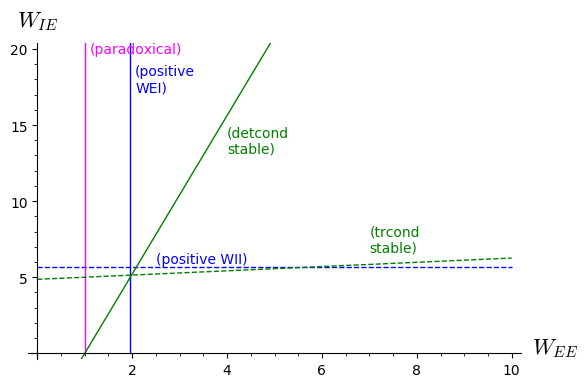

In [35]:
W_EE_max = 10
fig1 = line([[W_EE.subs(positive_WEI_cond_border_pdx),0],[W_EE.subs(positive_WEI_cond_border_pdx),50]],color='blue',linestyle='-',legend_label='positive WEI')
fig2 = line([[0,W_IE.subs(positive_WII_cond_border_pdx)],[W_EE_max,W_IE.subs(positive_WII_cond_border_pdx)]],color='blue',linestyle='--',legend_label='positive WEI')
fig3 = line([[W_EE.subs(paradox_cond_border_pdx),0],[W_EE.subs(paradox_cond_border_pdx),50]],color='magenta',legend_label='paradoxical')
fig4 = plot(W_IE.subs(neural_stable_detcond_v2_border_pdx),(W_EE,0,W_EE_max),ymin=0,color='green',linestyle='-',legend_label='neural detcond')
fig5 = plot(W_IE.subs(neural_stable_trcond_v2_border_pdx),(W_EE,0,W_EE_max),ymin=0,color='green',linestyle='--',legend_label='neural trcond')
tt1 = text('(positive\nWEI)', (0.1+W_EE.subs(positive_WEI_cond_border_pdx),18),color='blue',horizontal_alignment='left')
tt2 = text('(positive WII)', (2.5,0.5+W_IE.subs(positive_WII_cond_border_pdx)),color='blue',horizontal_alignment='left')
tt3 = text('(paradoxical)', (0.1+W_EE.subs(paradox_cond_border_pdx),20),color='magenta',horizontal_alignment='left')
tt4 = text('(detcond\nstable)', (4,14),color='green',horizontal_alignment='left')
tt5 = text('(trcond\nstable)', (7,7.5),color='green',horizontal_alignment='left')
fig = fig1 + fig2 + fig3 + fig4 + fig5 + tt1 + tt2 + tt3 + tt4 + tt5
fig.xmin(0)
fig.xmax(W_EE_max)
fig.ymin(0)
fig.ymax(20)
fig.axes_labels(['$W_{EE}$', '$W_{IE}$'])
fig.set_legend_options(loc='upper right')
fig.legend(False)
#fig.save('CH_stability.pdf')
fig.save('CH_stability.png')
show(fig)